In [47]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize  # for reshaping images to 3x28x28

from skimage.color import rgb2gray  # for converting images to grayscale

In [12]:
file_path = 'data_train.npy'
images = np.load(file_path)

In [22]:
images.shape

(270000, 8443)

In [42]:
def plot_images(images_data, num_images):
    # Setting up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

    for i in range(num_images):
        # Reshape and compress each image
        image = images_data[i].reshape(300, 300, 3)

        # Plot each compressed image
        ax = axes[i]
        ax.imshow(image)
        ax.axis('off')  # No axis for images

    plt.show()

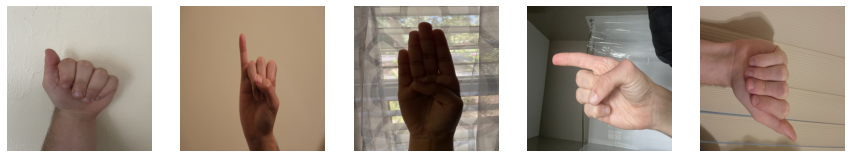

In [43]:
plot_images(images.T, 5)

In [44]:
def plot_compressed_images(images_data, n):
    # Setting up the plot
    fig, axes = plt.subplots(1, n, figsize=(15, 15))

    for i in range(n):
        # Reshape and compress each image
        image = images_data[i].reshape(300, 300, 3)
        compressed_image = resize(image, (28, 28), anti_aliasing=True)

        # Plot each compressed image
        ax = axes[i]
        ax.imshow(compressed_image)
        ax.axis('off')  # No axis for images

    plt.show()

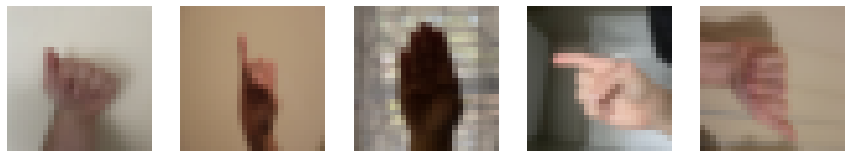

In [46]:
plot_compressed_images(images.T, 5)

In [59]:
def plot_first_n_compressed_grayscale_images(images_data, n):
    # Determine the grid size: find the square root of n and round up to nearest integer
    grid_size = int(np.ceil(np.sqrt(n)))

    # Calculate the figure size - adjust these values as needed
    # Assuming 3 inches per image for both width and height
    fig_width = grid_size * 3
    fig_height = grid_size * 3

    # Setting up the plot with a dynamic grid size and figure size
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    for i in range(n):
        # Image processing steps...
        image = images_data[i].reshape(300, 300, 3)
        compressed_image = resize(image, (28, 28), anti_aliasing=True)
        grayscale_image = rgb2gray(compressed_image)

        # Plot each grayscale image
        axes[i].imshow(grayscale_image, cmap='gray')
        axes[i].axis('off')  # No axis for images

    # Hide any unused subplots
    for i in range(n, grid_size * grid_size):
        axes[i].axis('off')

    plt.show()

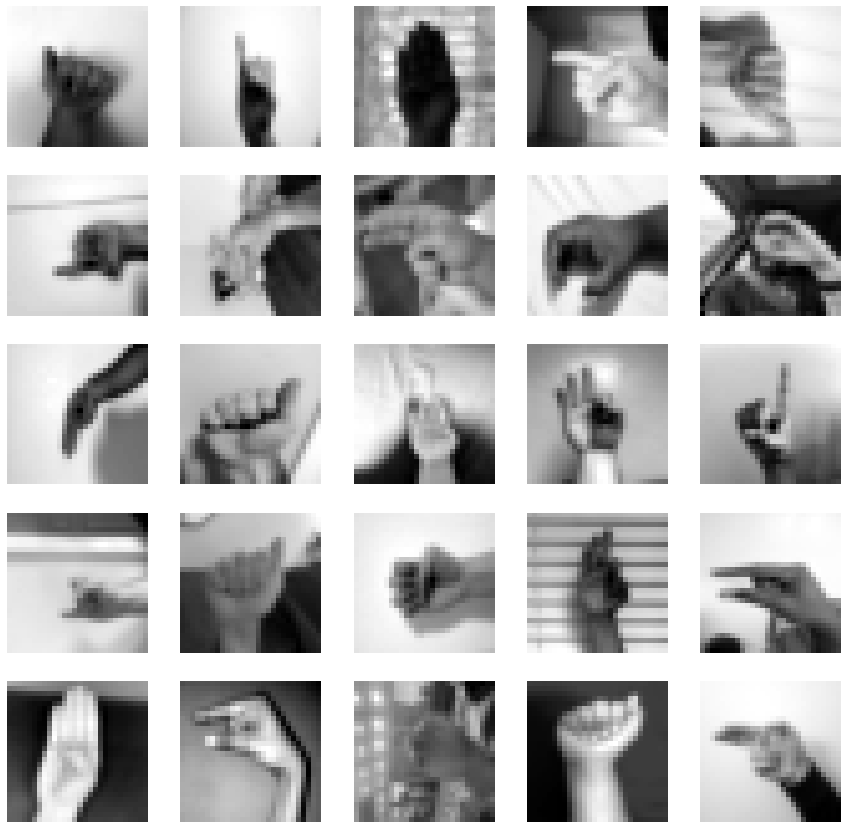

In [60]:
plot_first_n_compressed_grayscale_images(images.T, 25)

In [61]:
from PIL import Image

def resize_with_pil(image_array, new_size=(28, 28)):
    image = Image.fromarray(image_array.astype('uint8'), 'RGB')
    resized_image = image.resize(new_size, Image.LANCZOS)  # Using LANCZOS resampling
    return np.array(resized_image)

def plot_first_n_compressed_grayscale_images_with_pil(images_data, n):
    # Determine the grid size: find the square root of n and round up to nearest integer
    grid_size = int(np.ceil(np.sqrt(n)))

    # Calculate the figure size - adjust these values as needed
    fig_width = grid_size * 3
    fig_height = grid_size * 3

    # Setting up the plot with a dynamic grid size and figure size
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(fig_width, fig_height))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    for i in range(n):
        # Reshape the image to its original dimensions and convert to uint8
        image = images_data[i].reshape(300, 300, 3).astype('uint8')

        # Resize using PIL and convert to grayscale
        compressed_image = resize_with_pil(image, (28, 28))
        grayscale_image = rgb2gray(compressed_image)

        # Plot each grayscale image
        axes[i].imshow(grayscale_image, cmap='gray')
        axes[i].axis('off')  # No axis for images

    # Hide any unused subplots
    for i in range(n, grid_size * grid_size):
        axes[i].axis('off')

    plt.show()

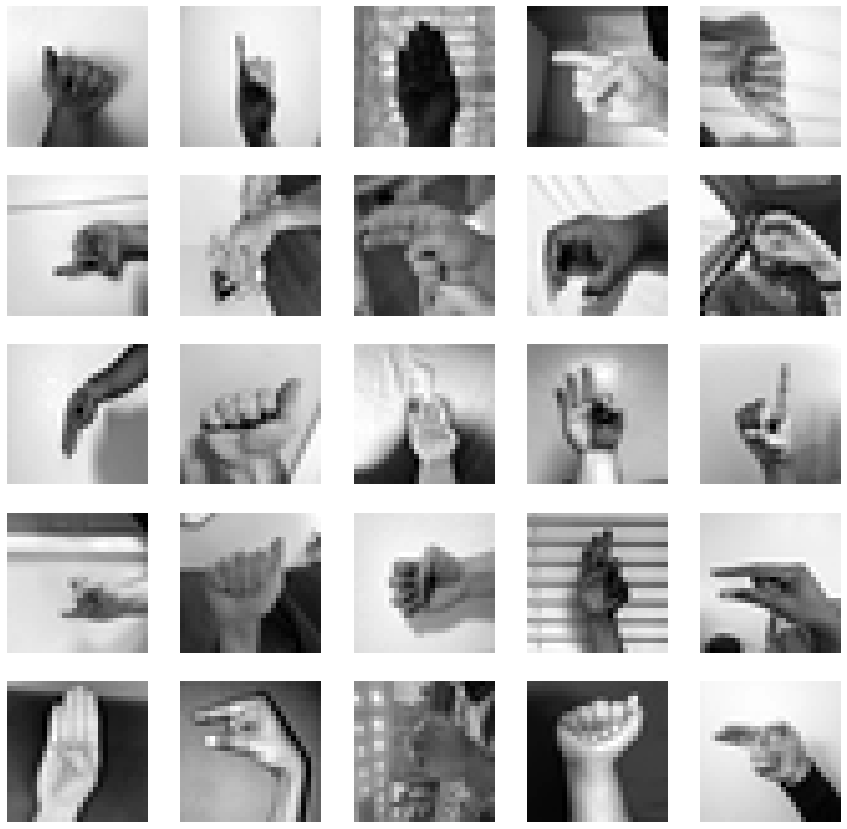

In [63]:
plot_first_n_compressed_grayscale_images_with_pil(images.T, 25)

In [64]:
def transform_images(images_data, new_size=(28, 28)):
    # Initialize an empty array to store the transformed images
    transformed_images = np.empty((len(images_data), new_size[0], new_size[1]))

    for i in range(len(images_data)):
        # Reshape and compress each image
        image = images_data[i].reshape(300, 300, 3)
        compressed_image = resize_with_pil(image, new_size)

        # Convert to grayscale
        grayscale_image = rgb2gray(compressed_image)

        # Store the transformed image
        transformed_images[i] = grayscale_image

    return transformed_images

In [65]:
transformed_images = transform_images(images.T)

In [66]:
transformed_images.shape

(8443, 28, 28)

In [67]:
# np.save('data_train_compressed_gs.npy', transformed_images)

In [69]:
# np.savetxt('data_train_compressed_gs.csv', transformed_images.reshape(transformed_images.shape[0], -1), delimiter=',')

In [70]:
data_int = (transformed_images * 255).astype(int)

In [71]:
np.savetxt('data_train_compressed_gs.csv', data_int.reshape(data_int.shape[0], -1), delimiter=',', fmt='%d')